# demo_gcfb_v211_speech

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kyama0321/gammachirpy/blob/main/gcfb_v211/demo_gcfb_v211_pulse.ipynb)

- Input signal: a pulse train
- Compare output signals of GammachirPy and the original dynamic compressive Gammachirp (dcGC) filterbank
  - cgc_out: outputs of the "compressive" gammachirp filterbank (dependent on the input signal level)
  - pgc_out: outputs of the "passive" gammachirp filterbank (not dependent on the input signal level)
- The output signals of the original dcGC filterbank are saved as a mat-file (.mat).

## Set Up

### For Google Colaboratory Uses
- remove comment-out and execute all scripts 

In [1]:
#!git clone https://github.com/kyama0321/gammachirpy

In [2]:
#%cd "gammachirpy/gcfb_v211"

### For All Users

In [3]:
import os
import copy
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio

import utils
import gcfb_v211 as gcfb

## Set default parameters for the Gammachirp filterbank (GCFB)

In [4]:
class GCparamDefault:
        fs = 48000 # sampling frequency
        num_ch = 100 # number of channels
        f_range = np.array([100, 6000]) # range of center frequencies
        out_mid_crct = "No" # outer & middle ear correlations
        ctrl = "dynamic" # used to be 'tyme-varying'

## Read a sample speech sound

In [5]:
# stiuli : a sample speech sound
file_name = 'snd_gammachirpy.wav'
path_dir = './sample/'
path_file = path_dir + file_name

# read sample speech
snd, fs = utils.audioread(path_file)
t_snd = len(snd)/fs
t = np.arange(0, len(snd), 1)/fs
print(f"Duration of sound = {t_snd*1000} (ms)")

Duration of sound = 1343.8541666666665 (ms)


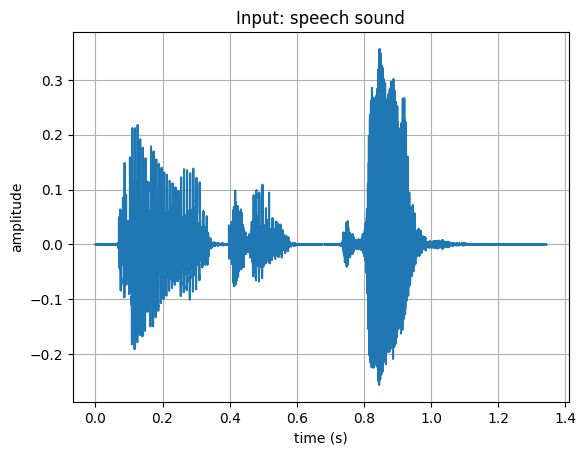

In [6]:
# Plot the input signal
fig, ax = plt.subplots()
ax.plot(t,snd)
ax.set_title("Input: speech sound")
ax.set_xlabel("time (s)")
ax.set_ylabel("amplitude")
plt.grid()

plt.show()

In [7]:
# Play the speech sound
Audio(snd, rate=fs)

## Input level: 40 dB SPL

In [8]:
# sound pressure level (SPL)
dbspl = 40

In [9]:
# Level equalization
snd_eq, _ = utils.eqlz2meddis_hc_level(snd, dbspl)

# GCFB
gc_param = GCparamDefault()
cgc_out, pgc_out, _, _ = gcfb.gcfb_v211(snd_eq, gc_param)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.1 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.4 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of acf_status
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 1343.9 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 134.4 (ms) / 1343.9 (ms). elapsed time = 1.6 (sec)
Dynamic Compressive-Gammachirp: Time 268.7 (ms) / 1343.9 (ms). elapsed time = 3.3 (sec)
Dynamic Compressive-Gammachir

In [10]:
# load original outputs
name_file = f"./original/GCFBv211_GCout_{gc_param.ctrl}_speech_{gc_param.out_mid_crct}_{dbspl}dBSPL.mat"
gc_out_org = sio.loadmat(name_file)
gc_out_org = gc_out_org['GCout']

# pGCout
pgc_out_org = gc_out_org['pGCout'][0][0]
rmse = utils.rms(pgc_out_org - pgc_out)
print(f'RMSE (pGC): {rmse}')

# cGCout
cgc_out_org = gc_out_org['cGCout'][0][0]
rmse = utils.rms(cgc_out_org - cgc_out)
print(f'RMSE (cGC): {rmse}')

RMSE (pGC): 1.1219789118165417e-14
RMSE (cGC): 1.1444736130089305e-13


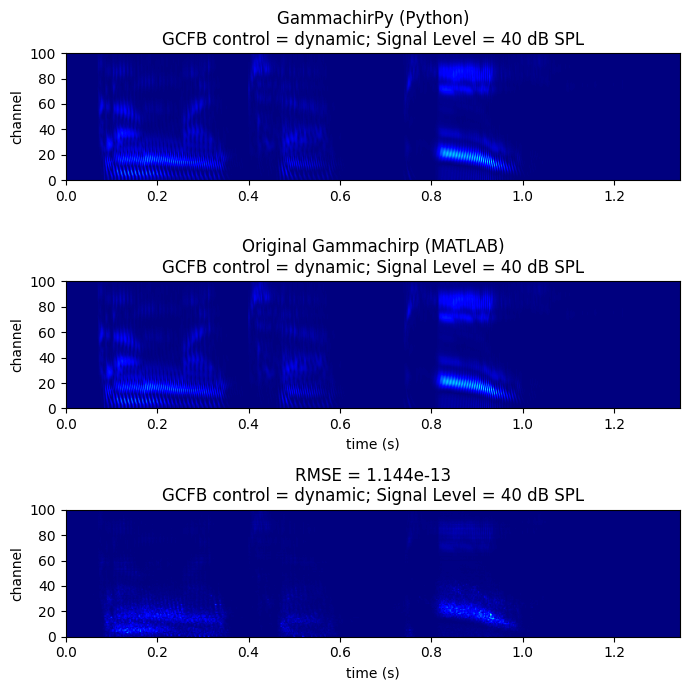

In [11]:
plt.rcParams['figure.figsize'] = (7, 7)

# GammachirPy (Python)
ax = plt.subplot(3, 1, 1)
plt.imshow(np.maximum(cgc_out, 0), \
    extent=[min(t), max(t), 0, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title("GammachirPy (Python)\n" \
               + f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_ylabel("channel")

# Original Gammachirp (MATLAB)
ax = plt.subplot(3, 1, 2)
plt.imshow(np.maximum(cgc_out_org, 0), \
    extent=[min(t), max(t), 0, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"Original Gammachirp (MATLAB)\n" \
               + f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xlabel("time (s)")
ax.set_ylabel("channel")

# RMSE (cGC)
ax = plt.subplot(3, 1, 3)
error = np.sqrt((cgc_out_org - cgc_out)**2)
plt.imshow(np.maximum(error, 0), \
    extent=[min(t), max(t), 0, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"RMSE = {rmse:.3e}\n" \
               + f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xlabel("time (s)")
ax.set_ylabel("channel")

plt.tight_layout()
plt.show()

## Input level: 60 dB SPL

In [12]:
# sound pressure level (SPL)
dbspl = 60

In [13]:
# Level equalization
snd_eq, _ = utils.eqlz2meddis_hc_level(snd, dbspl)

# GCFB
gc_param = GCparamDefault()
cgc_out, pgc_out, _, _ = gcfb.gcfb_v211(snd_eq, gc_param)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.1 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.4 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of acf_status
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 1343.9 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 134.4 (ms) / 1343.9 (ms). elapsed time = 1.6 (sec)
Dynamic Compressive-Gammachirp: Time 268.7 (ms) / 1343.9 (ms). elapsed time = 3.3 (sec)
Dynamic Compressive-Gammachir

In [14]:
# load original outputs
name_file = f"./original/GCFBv211_GCout_{gc_param.ctrl}_speech_{gc_param.out_mid_crct}_{dbspl}dBSPL.mat"
gc_out_org = sio.loadmat(name_file)
gc_out_org = gc_out_org['GCout']

# pGCout
pgc_out_org = gc_out_org['pGCout'][0][0]
rmse = utils.rms(pgc_out_org - pgc_out)
print(f'RMSE (pGC): {rmse}')

# cGCout
cgc_out_org = gc_out_org['cGCout'][0][0]
rmse = utils.rms(cgc_out_org - cgc_out)
print(f'RMSE (cGC): {rmse}')

RMSE (pGC): 1.1219527001811604e-13
RMSE (cGC): 6.702882423558187e-13


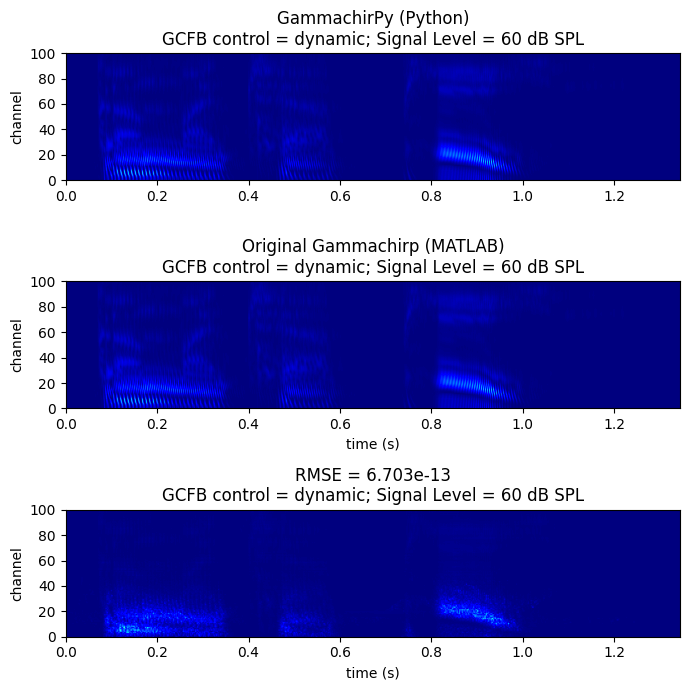

In [15]:
plt.rcParams['figure.figsize'] = (7, 7)

# GammachirPy (Python)
ax = plt.subplot(3, 1, 1)
plt.imshow(np.maximum(cgc_out, 0), \
    extent=[min(t), max(t), 0, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title("GammachirPy (Python)\n" \
               + f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_ylabel("channel")

# Original Gammachirp (MATLAB)
ax = plt.subplot(3, 1, 2)
plt.imshow(np.maximum(cgc_out_org, 0), \
    extent=[min(t), max(t), 0, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"Original Gammachirp (MATLAB)\n" \
               + f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xlabel("time (s)")
ax.set_ylabel("channel")

# RMSE (cGC)
ax = plt.subplot(3, 1, 3)
error = np.sqrt((cgc_out_org - cgc_out)**2)
plt.imshow(np.maximum(error, 0), \
    extent=[min(t), max(t), 0, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"RMSE = {rmse:.3e}\n" \
               + f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xlabel("time (s)")
ax.set_ylabel("channel")

plt.tight_layout()
plt.show()

## Input level: 80 dB SPL

In [16]:
# sound pressure level (SPL)
dbspl = 80

In [17]:
# Level equalization
snd_eq, _ = utils.eqlz2meddis_hc_level(snd, dbspl)

# GCFB
gc_param = GCparamDefault()
cgc_out, pgc_out, _, _ = gcfb.gcfb_v211(snd_eq, gc_param)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.1 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.4 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of acf_status
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 1343.9 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 134.4 (ms) / 1343.9 (ms). elapsed time = 1.6 (sec)
Dynamic Compressive-Gammachirp: Time 268.7 (ms) / 1343.9 (ms). elapsed time = 3.3 (sec)
Dynamic Compressive-Gammachir

In [18]:
# load original outputs
name_file = f"./original/GCFBv211_GCout_{gc_param.ctrl}_speech_{gc_param.out_mid_crct}_{dbspl}dBSPL.mat"
gc_out_org = sio.loadmat(name_file)
gc_out_org = gc_out_org['GCout']

# pGCout
pgc_out_org = gc_out_org['pGCout'][0][0]
rmse = utils.rms(pgc_out_org - pgc_out)
print(f'RMSE (pGC): {rmse}')

# cGCout
cgc_out_org = gc_out_org['cGCout'][0][0]
rmse = utils.rms(cgc_out_org - cgc_out)
print(f'RMSE (cGC): {rmse}')

RMSE (pGC): 1.1220906809577551e-12
RMSE (cGC): 4.584750177642606e-12


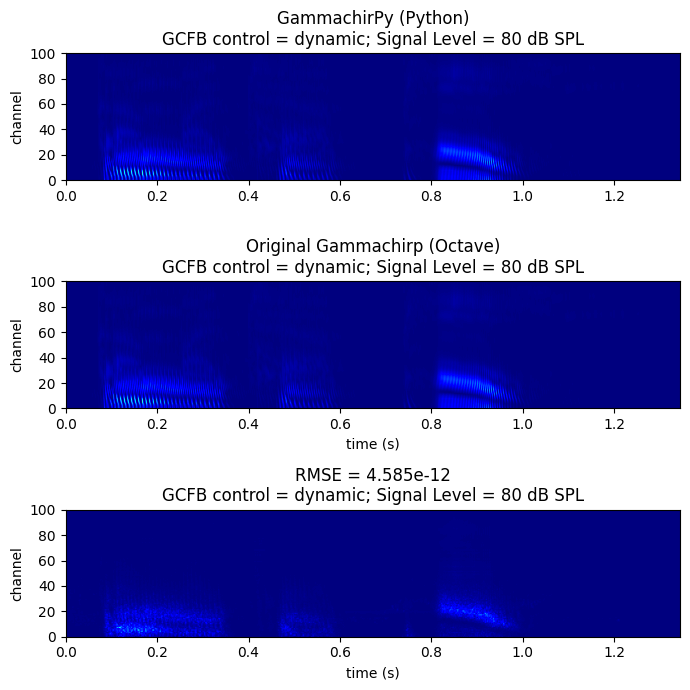

In [19]:
plt.rcParams['figure.figsize'] = (7, 7)

# GammachirPy (Python)
ax = plt.subplot(3, 1, 1)
plt.imshow(np.maximum(cgc_out, 0), \
    extent=[min(t), max(t), 0, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title("GammachirPy (Python)\n" \
               + f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_ylabel("channel")

# Original Gammachirp (MATLAB)
ax = plt.subplot(3, 1, 2)
plt.imshow(np.maximum(cgc_out_org, 0), \
    extent=[min(t), max(t), 0, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"Original Gammachirp (Octave)\n" \
               + f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xlabel("time (s)")
ax.set_ylabel("channel")

# RMSE
ax = plt.subplot(3, 1, 3)
error = np.sqrt((cgc_out_org - cgc_out)**2)
plt.imshow(np.maximum(error, 0), \
    extent=[min(t), max(t), 0, 100], aspect='auto', origin='lower', cmap='jet')
ax.set_title(f"RMSE = {rmse:.3e}\n" \
               + f"GCFB control = {gc_param.ctrl}; Signal Level = {dbspl} dB SPL")
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xlabel("time (s)")
ax.set_ylabel("channel")

plt.tight_layout()
plt.show()